In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [16]:
cols = ['week','year', 'month', 'discount', 'dis', 'price', 'hao', 'p', 'c', 'h', 'ahao', 'ap', 'ac', 'pv', 'uv', 'sc', 'jg', 'avgst',
        'se','WeeksAgoNum', 'twoWeeksAgoNum','threeWeeksAgoNum']
sales = pd.read_csv('../cache/train/AA035409.csv').fillna(0)
train_x = sales[:-20][cols]
train_y = sales[:-20][['total']]
test_x = sales[-20:][cols]
test_y = sales[-20:][['total']]

In [17]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=12)

In [18]:
gbm= lgb.LGBMRegressor(objective='regression', num_leaves=2 ** 5, learning_rate=0.01, n_estimators=500)

In [19]:
gbm.fit(train_x,train_y,eval_set=[(valid_x, valid_y)],early_stopping_rounds=50,verbose = 2)

Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 5658.98
[4]	valid_0's l2: 5613.97
[6]	valid_0's l2: 5552.89
[8]	valid_0's l2: 5494.96
[10]	valid_0's l2: 5456.47
[12]	valid_0's l2: 5400.5
[14]	valid_0's l2: 5347.76
[16]	valid_0's l2: 5312.25
[18]	valid_0's l2: 5224.26
[20]	valid_0's l2: 5179.45
[22]	valid_0's l2: 5132.2
[24]	valid_0's l2: 5088.93
[26]	valid_0's l2: 5059.8
[28]	valid_0's l2: 5021.28
[30]	valid_0's l2: 4979.16
[32]	valid_0's l2: 4912.06
[34]	valid_0's l2: 4874.3
[36]	valid_0's l2: 4857.12
[38]	valid_0's l2: 4839.92
[40]	valid_0's l2: 4821.55
[42]	valid_0's l2: 4808.57
[44]	valid_0's l2: 4792.93
[46]	valid_0's l2: 4745.85
[48]	valid_0's l2: 4737.06
[50]	valid_0's l2: 4725.5
[52]	valid_0's l2: 4714.65
[54]	valid_0's l2: 4704.04
[56]	valid_0's l2: 4696.52
[58]	valid_0's l2: 4690.91
[60]	valid_0's l2: 4685.97
[62]	valid_0's l2: 4679.31
[64]	valid_0's l2: 4676.83
[66]	valid_0's l2: 4644.95
[68]	valid_0's l2: 4645.62
[70]	valid_0's l2: 4644.25
[72

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=32,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [20]:
preds =gbm.predict(test_x.values, num_iteration=gbm.best_iteration_)

In [21]:
preds

array([123.97469429,  94.03667069, 135.09898139,  73.89106734,
        79.31444753,  78.88463751,  86.83606196, 134.33901622,
       134.38211451, 138.96605336,  87.68288711, 138.96605336,
       167.12955141, 138.0767752 , 162.0281697 , 181.75099717,
       181.75099717, 180.0186546 , 167.11451801, 116.06690255])

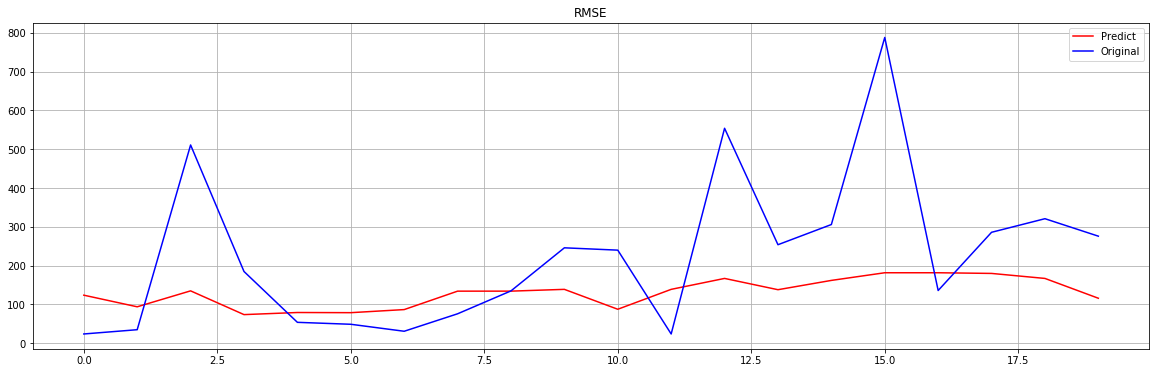

In [22]:
test_true_data = pd.DataFrame(data={'actual': test_y.total.values})
test_pred_data = pd.DataFrame(data={'prediction': preds})
plt.figure()
test_pred_data.prediction.plot(color='red', label='Predict', figsize=(20, 6))
test_true_data.actual.plot(color='blue', label='Original', figsize=(20, 6))
plt.title('RMSE')
plt.legend(loc='best')  # 将样例显示出来
plt.grid(True)
plt.show()